In [ ]:
# VGG16 to Train ASL Dataset
import os
import cv2
import numpy as np
from time import time
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Convolution2D, MaxPooling2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from tqdm.notebook import tqdm, trange
import matplotlib.pyplot as plt
%matplotlib inline


data = 'D:\Dataset'
train_data = os.path.join(data, 'asl_alphabet_train')
test_data = os.path.join(data, 'asl_alphabet_test')
#I suggest using the Kaggle notebook as adding the dataset the way I have caused the code to run for an hour or longer-
#-during the training phase

In [2]:
IMG_SIZE = 200*200
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 
           'W', 'X', 'Y', 'Z', 'nothing', 'space', 'del']
CATEGORIES = []

for i in os.listdir(train_data):
    CATEGORIES.append(i)
    
print(CATEGORIES)

['A', 'B', 'C', 'D', 'del', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'nothing', 'O', 'P', 'Q', 'R', 'S', 'space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


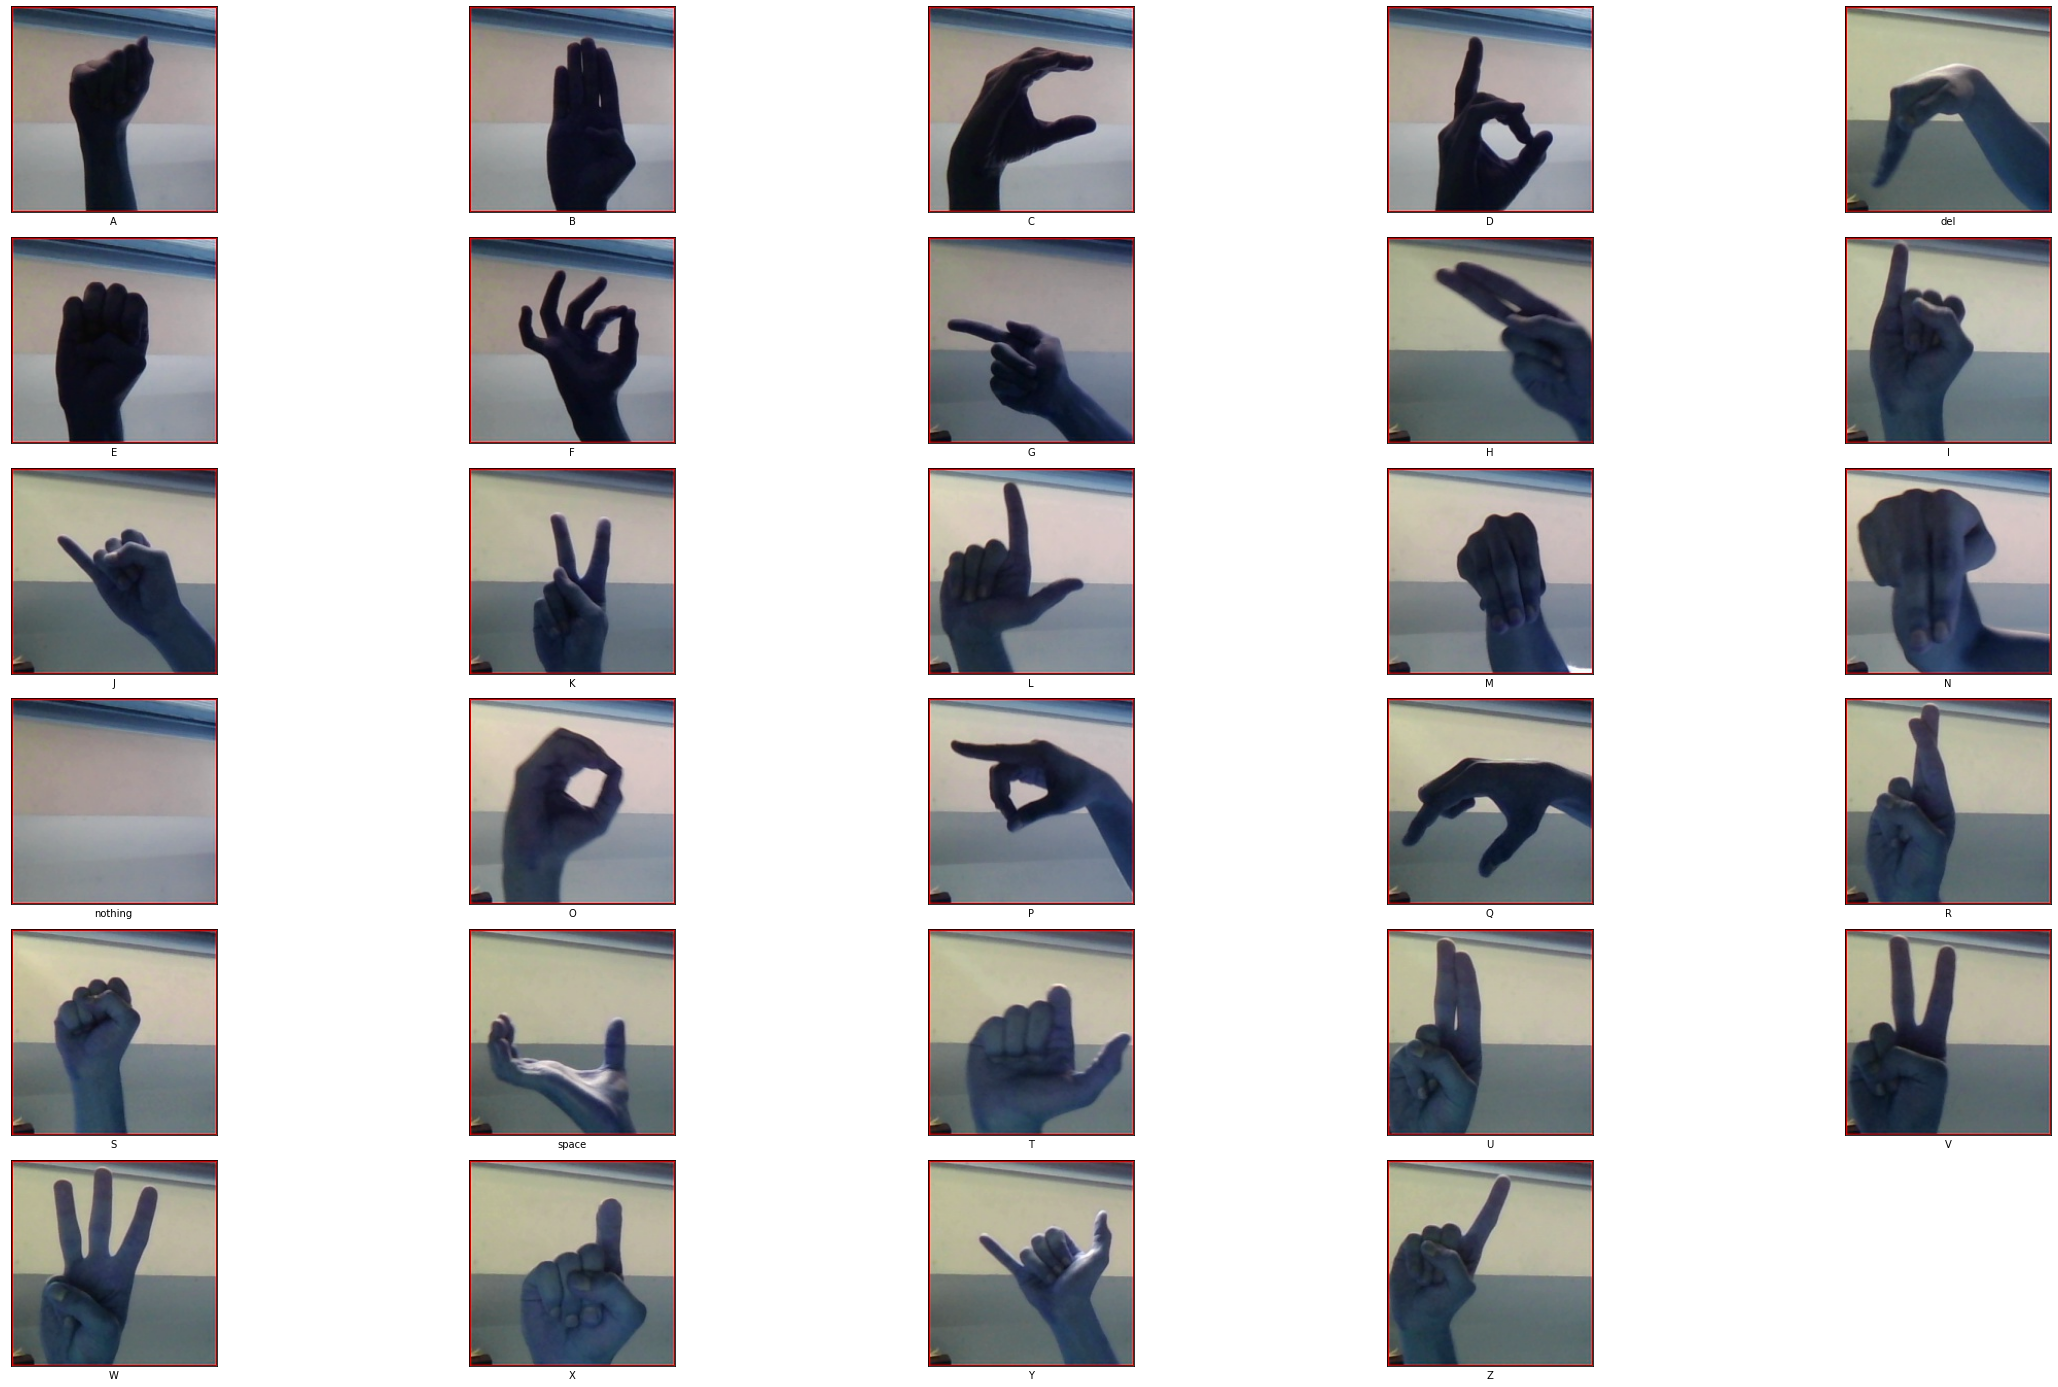

In [3]:
plt.figure(figsize=(32,32))
i=0
for c in CATEGORIES:  
    path = os.path.join(train_data,c)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.subplot(10,5,i+1)
        plt.imshow(img_array)
        plt.xlabel(c)
        plt.xticks([])
        plt.yticks([])
        i += 1
        break

plt.tight_layout()        
plt.show()

In [4]:
def load_data(train_dir):
    images = []
    labels = []
    size = 32,32
    index = -1
    for folder in tqdm(os.listdir(train_data),desc='Overall Progress'):
        index +=1
        print('Folder: '+classes[index])
        for image in tqdm(os.listdir(train_data + "/" + folder)):
            temp_img = cv2.imread(train_data + '/' + folder + '/' + image)
            temp_img = cv2.resize(temp_img, size)
            images.append(temp_img)
            labels.append(index)
    
    images = np.array(images)
    images = images.astype('float32')/255.0
    labels = utils.to_categorical(labels)
    x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.1)
    
    print('Train data shape =', x_train.shape)
    print('Test data shape =', x_test.shape)
    
    return x_train, x_test, y_train, y_test

start = time()
x_train, x_test, y_train, y_test = load_data(train_data)
print('Loading:', time() - start)

Overall Progress:   0%|          | 0/29 [00:00<?, ?it/s]

Folder: A


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder: B


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder: C


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder: D


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder: E


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder: F


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder: G


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder: H


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder: I


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder: J


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder: K


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder: L


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder: M


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder: N


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder: O


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder: P


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder: Q


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder: R


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder: S


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder: T


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder: U


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder: V


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder: W


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder: X


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder: Y


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder: Z


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder: nothing


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder: space


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder: del


  0%|          | 0/3000 [00:00<?, ?it/s]

Train data shape = (78300, 32, 32, 3)
Test data shape = (8700, 32, 32, 3)
Loading: 85.75212526321411


In [8]:
model = Sequential() #VGG16 Implementation N.B. using the diagram helped alot. So did discussing with friends.

model.add(Convolution2D(input_shape=(32,32,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Convolution2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Convolution2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Convolution2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Convolution2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Convolution2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Convolution2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(29, activation='softmax'))

In [9]:
#Model Training
classes = 29
batch = 128
epochs = 7
learning_rate = 0.0001

model.summary()

adam = Adam(lr=learning_rate)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

start = time()
history = model.fit(x_train, y_train, batch_size=batch, epochs=epochs, validation_split=0.1, shuffle = True, verbose=1)
train_time = time() - start
print('\nTrain time: ', train_time)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 8, 8, 256)        

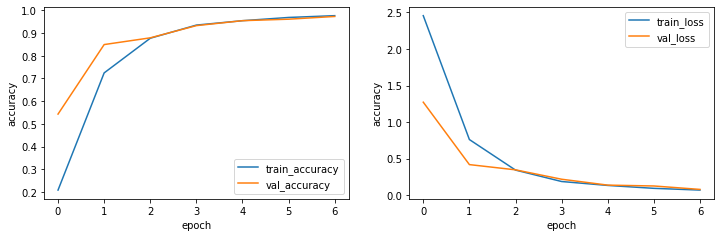

In [10]:
#Graphs
plt.figure(figsize=(12, 12))
plt.subplot(3, 2, 1)
plt.plot(history.history['accuracy'], label = 'train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.subplot(3, 2, 2)
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [11]:
  start = time()
  test_loss, test_acc = model.evaluate(x_test, y_test)
  test_time = time() - start
 
  print('Test accuracy:', test_acc)
  print('Test loss:', test_loss)
  print('Test time: ', test_time)

272/272 [==============================] - 27s 98ms/step - loss: 0.0717 - accuracy: 0.9791
Test accuracy: 0.9790804386138916
Test loss: 0.07168548554182053
Test time:  27.568336248397827


In [ ]:
#Khan, Moshiur Rahman = ID:18-36303-1 